<a href="https://colab.research.google.com/github/mohanaditya910/eip-season4-batch1/blob/master/week2/max_12k_BN_DO(0_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#image standardization........
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#image normalization................
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_test=(X_test-np.mean(X_test))/np.std(X_test)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#praying to the heavenly gods........................
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Activation,Dropout
from keras.optimizers import Adam

In [0]:
def skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block,dropout):

  model=Sequential()
  for i in range(layers_in_block):
    if i==0:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,input_shape=(28,28,1),activation='relu',use_bias=False))
      model.add(BatchNormalization())
    else:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',use_bias=False))
      model.add(BatchNormalization())
  model.add(Dropout(dropout))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=n_c_1,kernel_size=1,activation='relu',use_bias=False))
  model.add(BatchNormalization())

  for i in range(layers_in_block):
    model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',use_bias=False))
    model.add(BatchNormalization())
  model.add(Dropout(dropout))
  #no maxpooling
  model.add(Conv2D(filters=num_classes,kernel_size=1,activation='relu',use_bias=False))
  #activation is avoided.
  model.add(Conv2D(filters=num_classes,kernel_size=3,use_bias=False))
  model.add(Conv2D(filters=num_classes,kernel_size=3,use_bias=False))
  ##

  model.add(Flatten())
  model.add(Activation('softmax'))

  return model

In [0]:
input_shape=(28,28,1)
num_classes=10
layers_in_block=3


n_c_factor_3=8
n_c_1=8
dropout=0.05
opt=Adam(lr=0.003)


model=skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block,dropout)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 24)        3456      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 24)       

In [0]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 584us/step - loss: 0.1618 - acc: 0.9493 - val_loss: 0.0994 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 34s 568us/step - loss: 0.0685 - acc: 0.9789 - val_loss: 0.1124 - val_acc: 0.9662
Epoch 3/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0463 - val_acc: 0.9857
Epoch 4/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0406 - val_acc: 0.9878
Epoch 5/20
60000/60000 [==============================] - 34s 560us/step - loss: 0.0462 - acc: 0.9853 - val_loss: 0.0332 - val_acc: 0.9877
Epoch 6/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.0414 - acc: 0.9877 - val_loss: 0.0383 - val_acc: 0.9880
Epoch 7/20
60000/60000 [==============================] - 33s 556us/step - loss: 0.0385 - acc: 0.9879 - val_loss: 0.

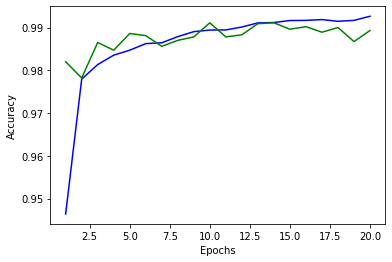

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Train_acc')
plt.plot(epochs,val_acc,'g',label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [0]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 112us/step


[0.03510365601907106, 0.9893]

val_accuracy 99.11, do_val=.1, the curve is erratic with no smooth behavior.


decreasing learning rate throughout the training will likely increase the val_acc because it gives model more opportunity to explore the minimas. 